In [2]:
import sys
import os
os.environ['PROJ_DATA'] = "/pscratch/sd/p/plutzner/proj_data"
import xarray as xr
import random
import numpy as np
import importlib as imp
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import cartopy.crs as ccrs
#import matplotlib.colors as mcolorsxx

%load_ext autoreload
%autoreload 2
import utils
import utils.filemethods as filemethods
from databuilder.data_generator import ClimateData
import databuilder.data_generator as data_generator
# import databuilder.nino_indices as nino_indices # CAUSES CELL TO HANG

print(f"python version = {sys.version}")
print(f"numpy version = {np.__version__}")
print(f"xarray version = {xr.__version__}")

python version = 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:08:06) [GCC 11.3.0]
numpy version = 1.26.4
xarray version = 2024.5.0


In [3]:
config = utils.get_config("exp001")
seed = config["seed_list"][0]

## Process Inputs and Target Data: --------------------------

In [3]:
imp.reload(utils)
imp.reload(filemethods)
imp.reload(data_generator)

data = ClimateData(
    config["databuilder"], 
    expname = config["expname"],
    seed=seed,
    data_dir = config["data_dir"], 
    figure_dir=config["figure_dir"],
    target_only = True, 
    fetch=False,
    verbose=False
)

In [4]:
d_train, d_val, d_test = data.fetch_data()

Opening .nc files
Opening .nc files
Opening .nc files
Processing training
isolating variables from ds
Processing target output
Length of target = 0
Processing validation
isolating variables from ds
Processing target output
Length of target = 0
Processing testing
isolating variables from ds
Processing target output
Length of target = 0


In [5]:
d_train["y"]

<xarray.DataArray 'PRECT' (time: 60211)> Size: 482kB
array([-0.12688022, -0.48002338, -1.79197601, ..., 16.78283364,
        2.73940417, -0.75435824])
Coordinates:
  * time     (time) object 482kB 1850-01-15 00:00:00 ... 2014-12-31 00:00:00
    lon      float64 8B 122.5
    lat      float64 8B 47.5

#### d_train, d_val, d_test --> pickle files

In [4]:
import pickle
import gzip

data_savename1 = "/pscratch/sd/p/plutzner/E3SM/bigdata/presaved/exp001_d_train_TARGET_1850-2014.pkl"
#data_savename1 = "/Users/C830793391/BIG_DATA/E3SM_Data/presaved/exp001_d_train.pkl"
# with gzip.open(data_savename1, "wb") as fp:
#     pickle.dump(d_train, fp)

data_savename2 = "/pscratch/sd/p/plutzner/E3SM/bigdata/presaved/exp001_d_val_TARGET_1850-2014.pkl"
#data_savename2 = "/Users/C830793391/BIG_DATA/E3SM_Data/presaved/exp001_d_val.pkl"
# with gzip.open(data_savename2, "wb") as fp:
#     pickle.dump(d_val, fp)

data_savename3 = "/pscratch/sd/p/plutzner/E3SM/bigdata/presaved/exp001_d_test_TARGET_1850-2014.pkl"
#data_savename3 = "/Users/C830793391/BIG_DATA/E3SM_Data/presaved/exp001_d_test.pkl"
# with gzip.open(data_savename3, "wb") as fp:
#     pickle.dump(d_test, fp)

#### retrieve d_train, d_val, d_test

In [5]:
with gzip.open(data_savename1, "rb") as obj1:
    d_train = pickle.load(obj1)
obj1.close()

with gzip.open(data_savename2, "rb") as obj2:
    d_val = pickle.load(obj2)
obj2.close()

with gzip.open(data_savename3, "rb") as obj3:
    d_test = pickle.load(obj3)
obj3.close()

In [7]:
d_train["y"].shape

(60211,)

## MJO Composites --------------------------

0
(60225, 7)


/pscratch/sd/p/plutzner/E3SM/databuilder/MJOindicescompositor.py:158: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


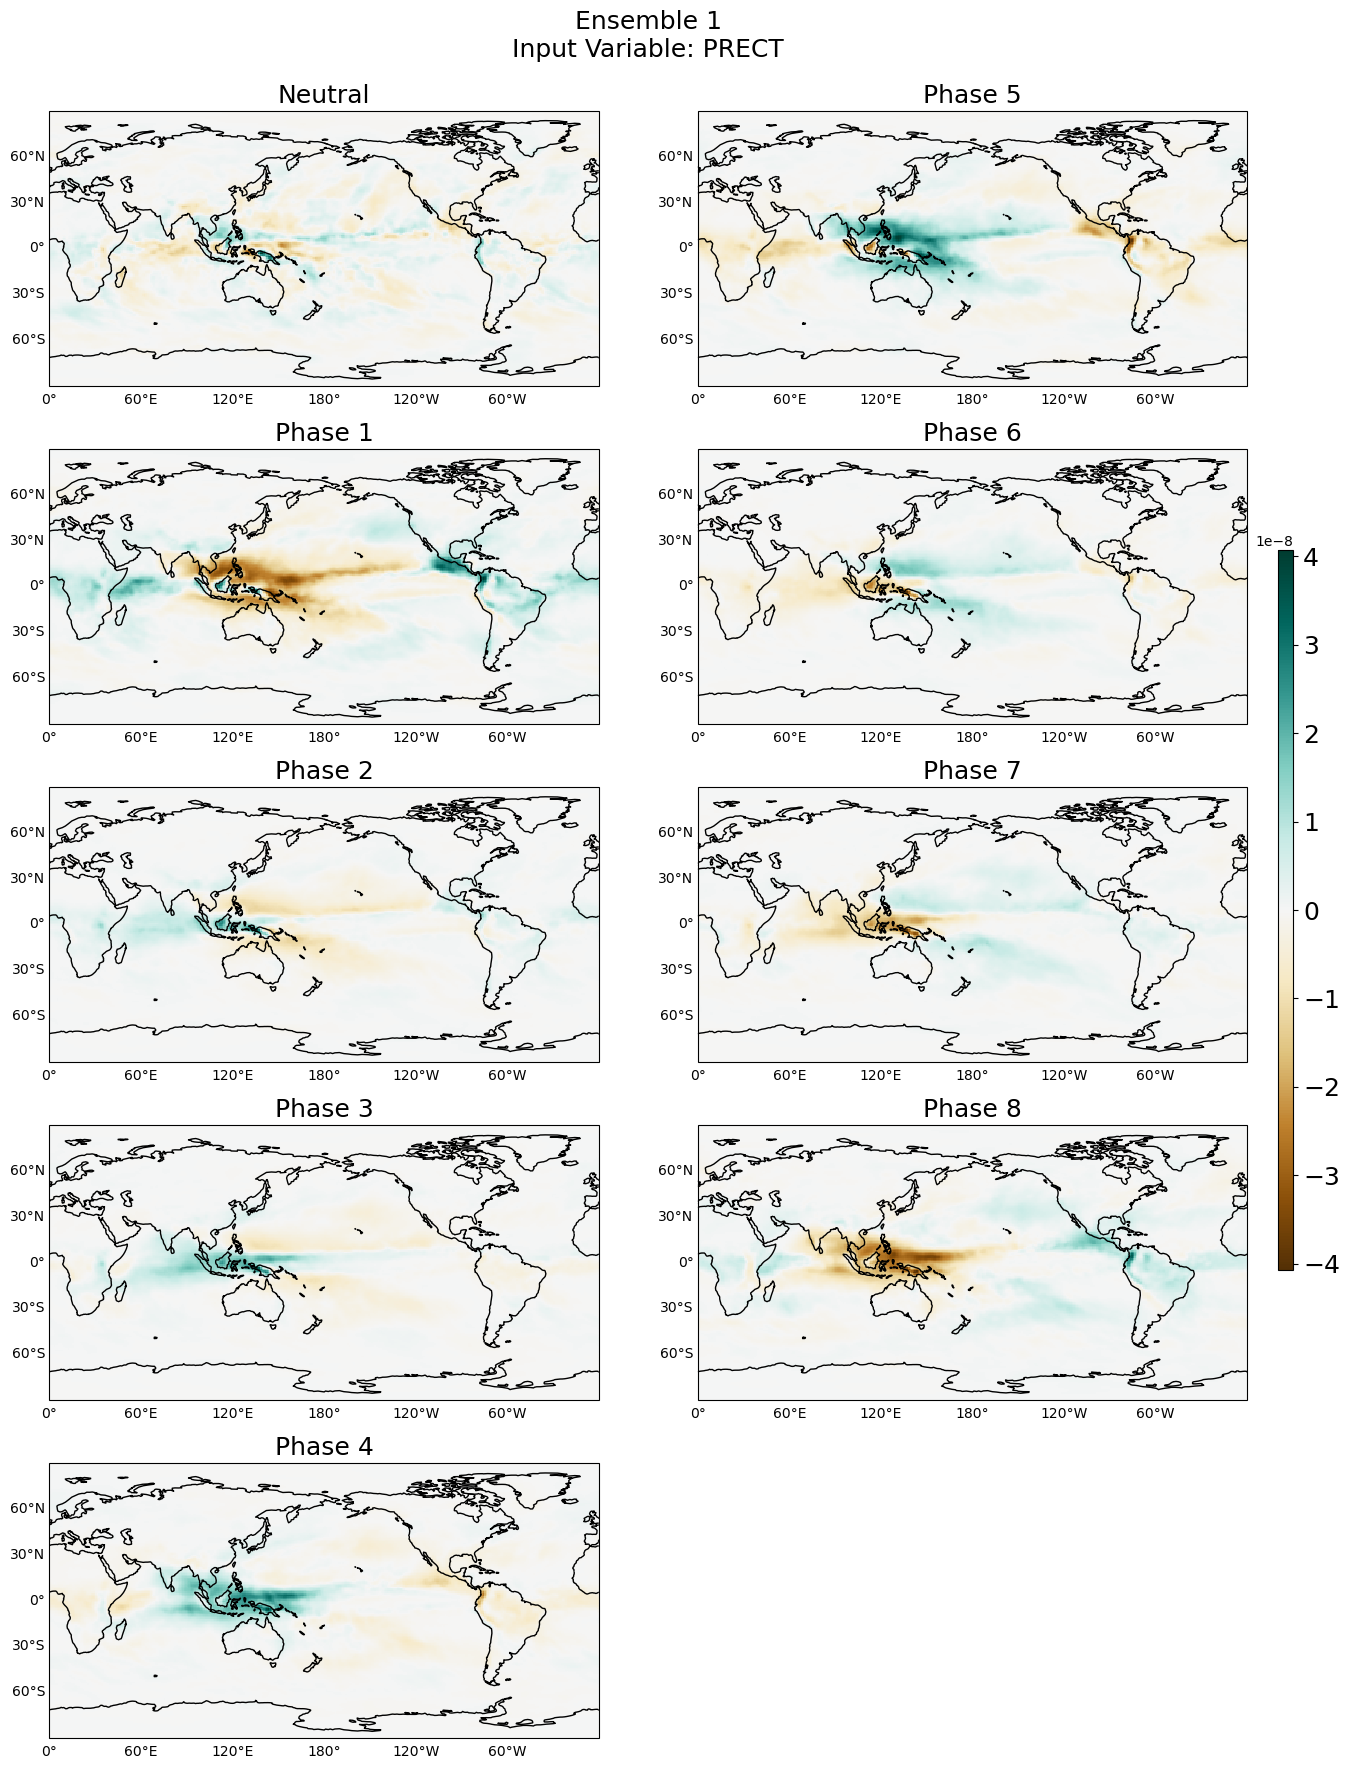

/pscratch/sd/p/plutzner/E3SM/databuilder/MJOindicescompositor.py:158: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


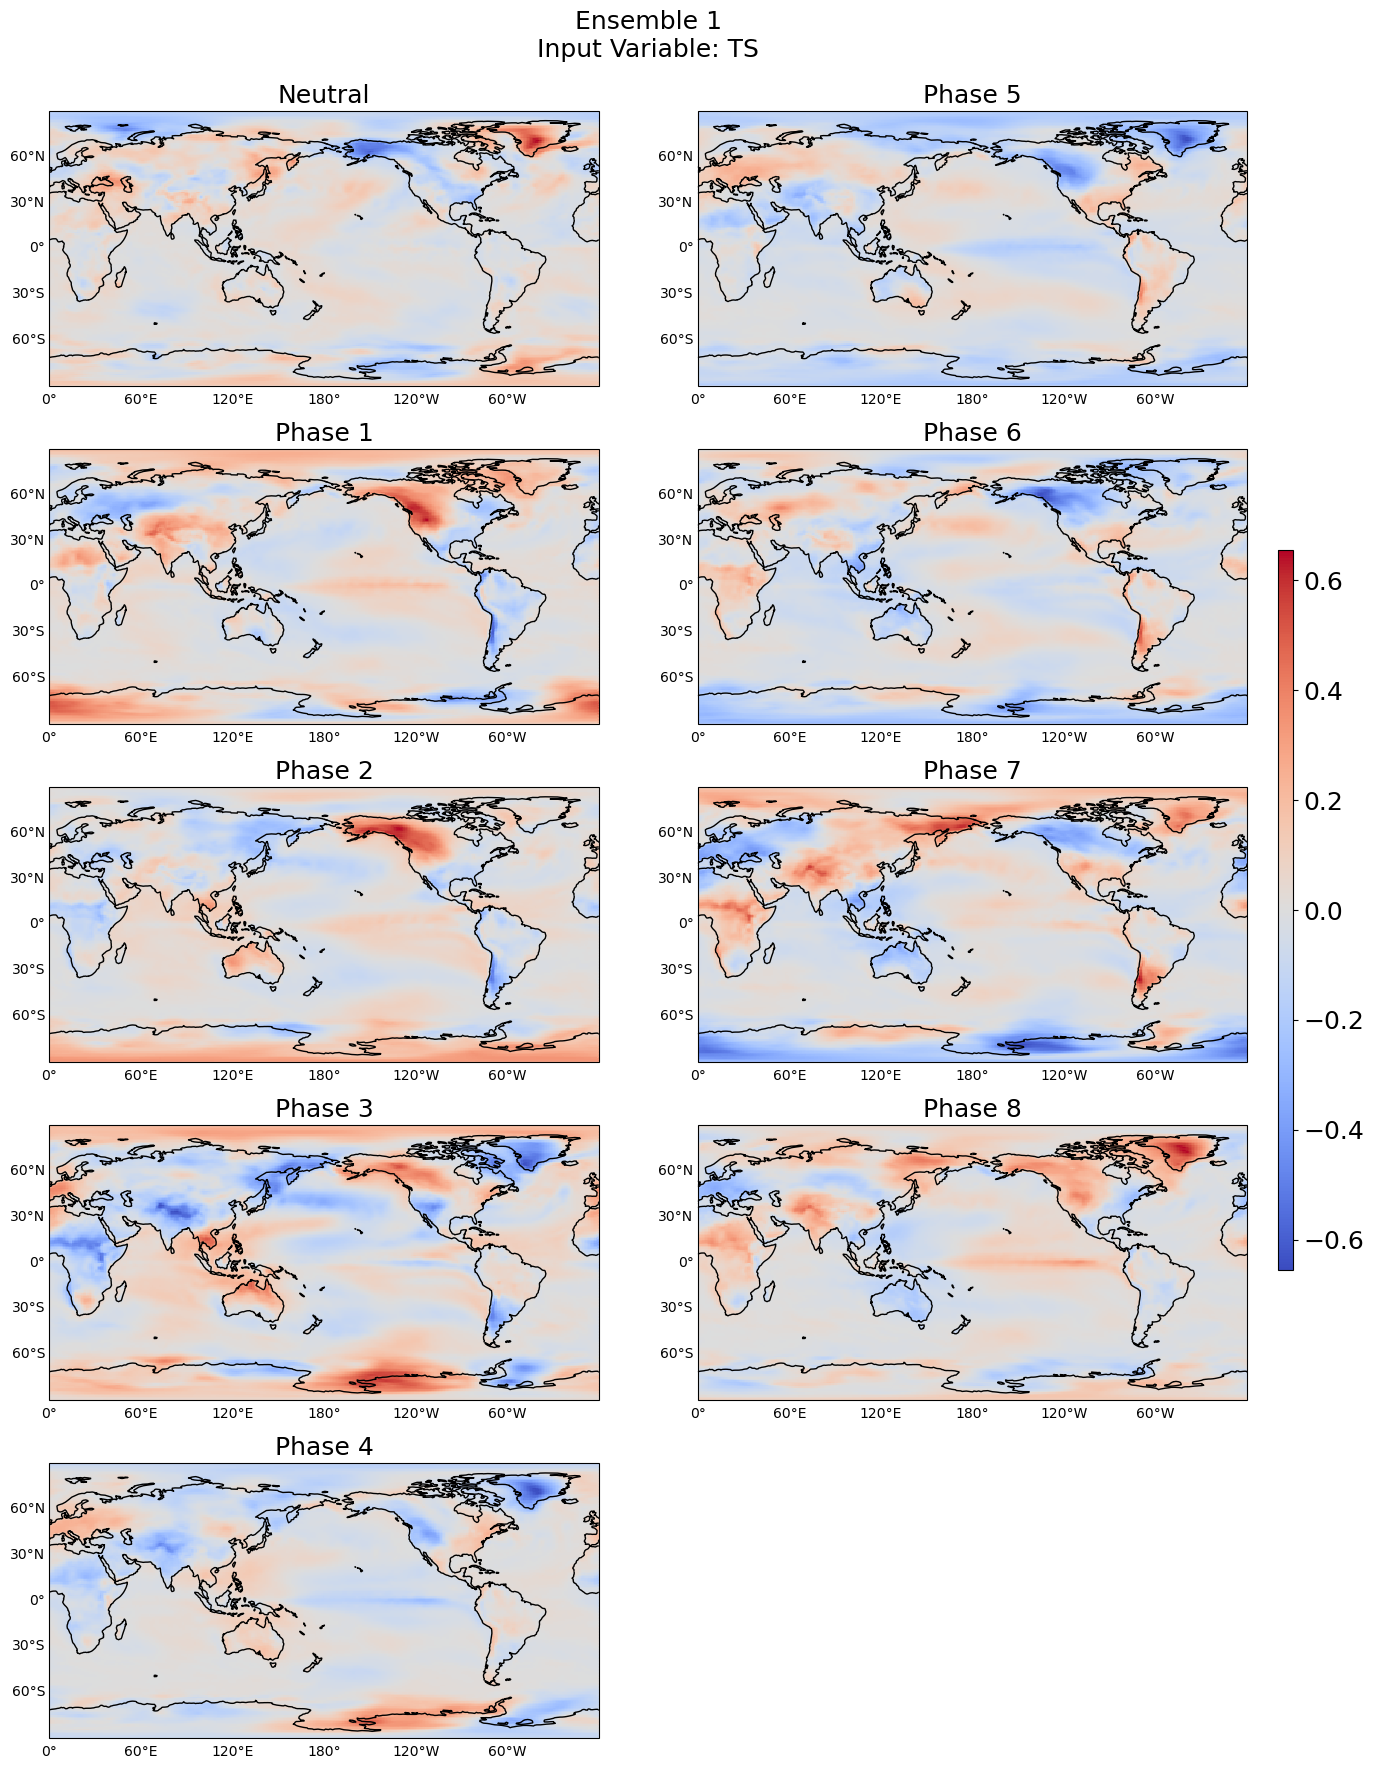

1
(60225, 7)


/pscratch/sd/p/plutzner/E3SM/databuilder/MJOindicescompositor.py:158: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


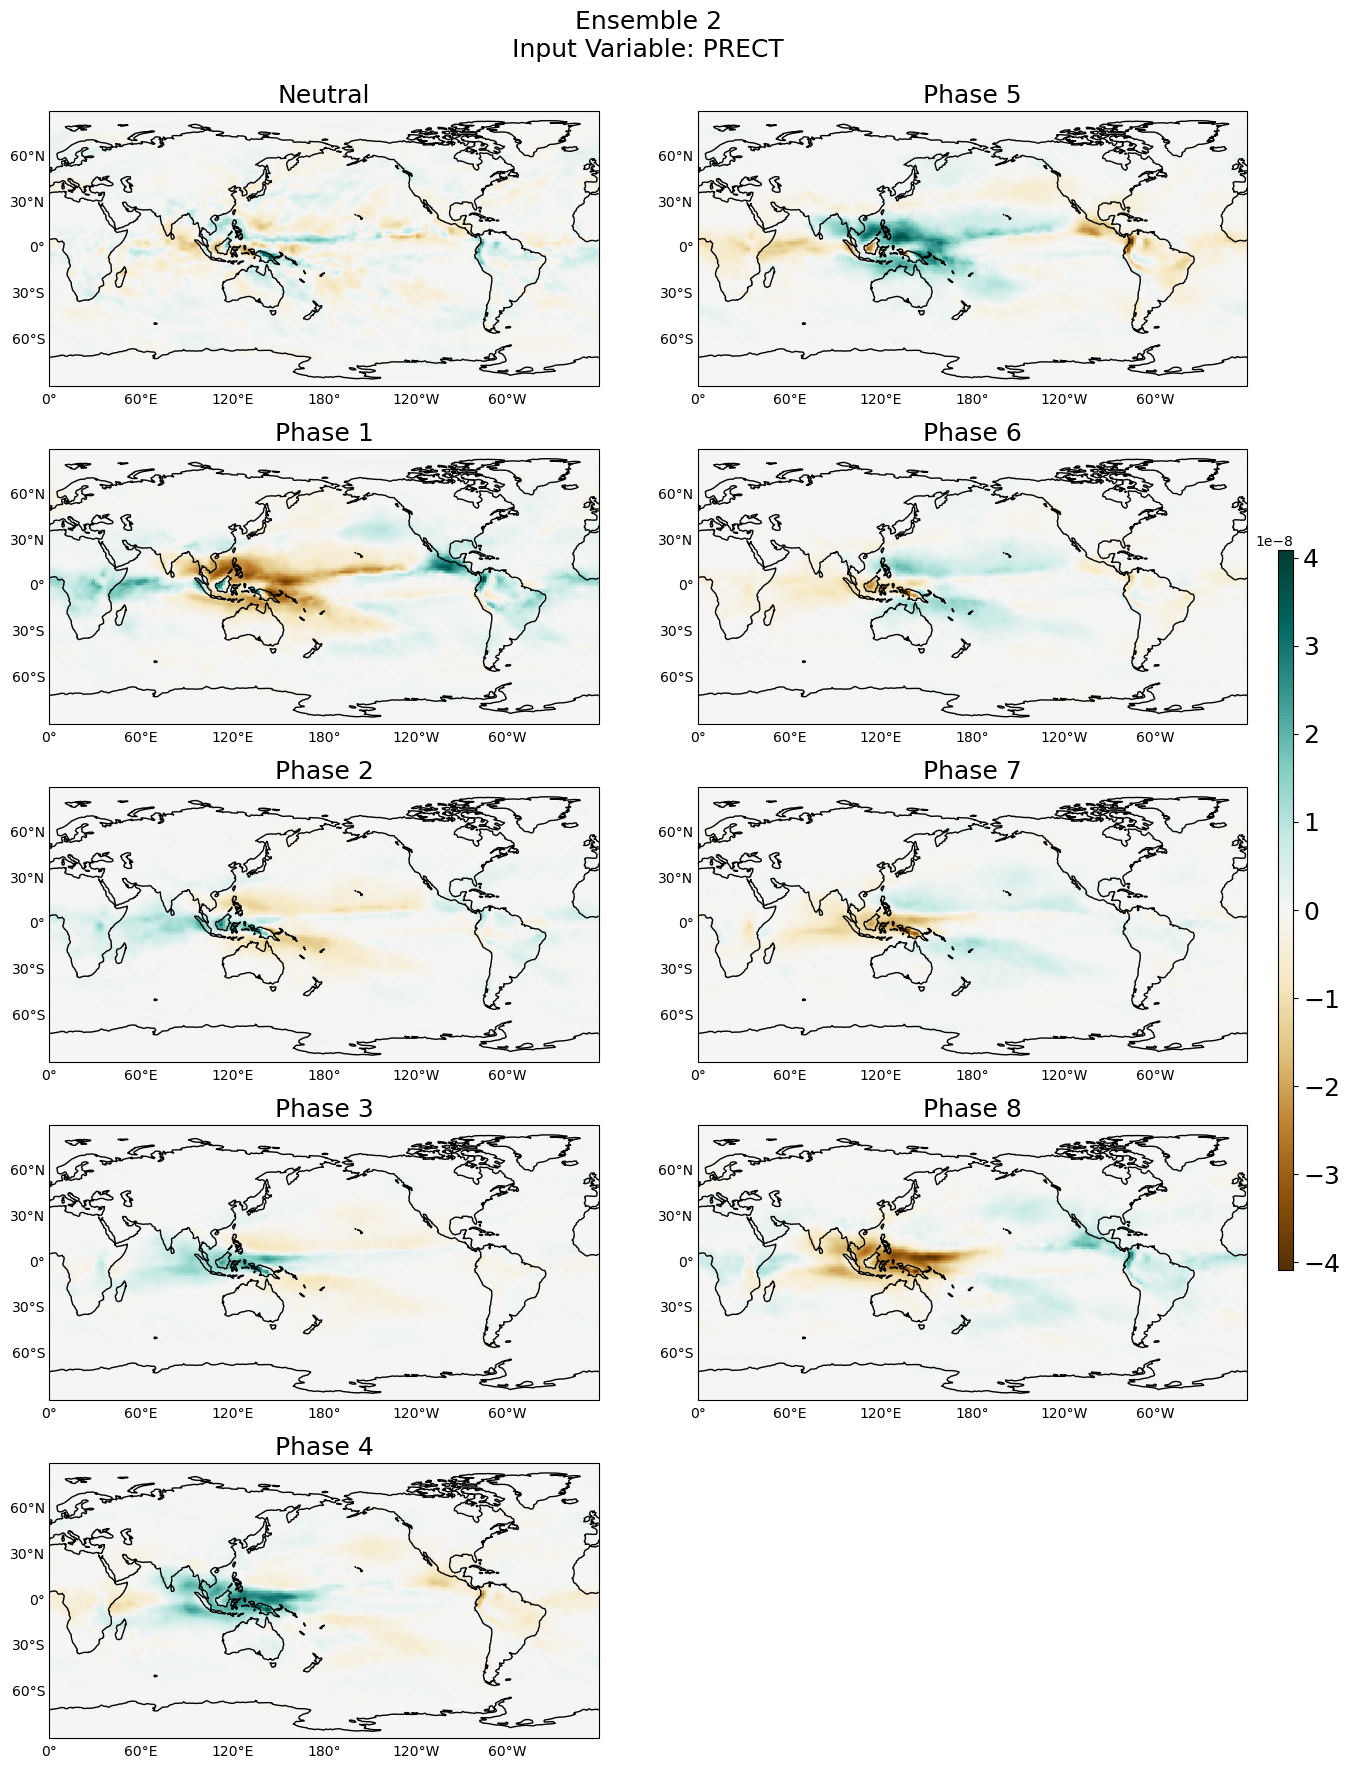

/pscratch/sd/p/plutzner/E3SM/databuilder/MJOindicescompositor.py:158: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


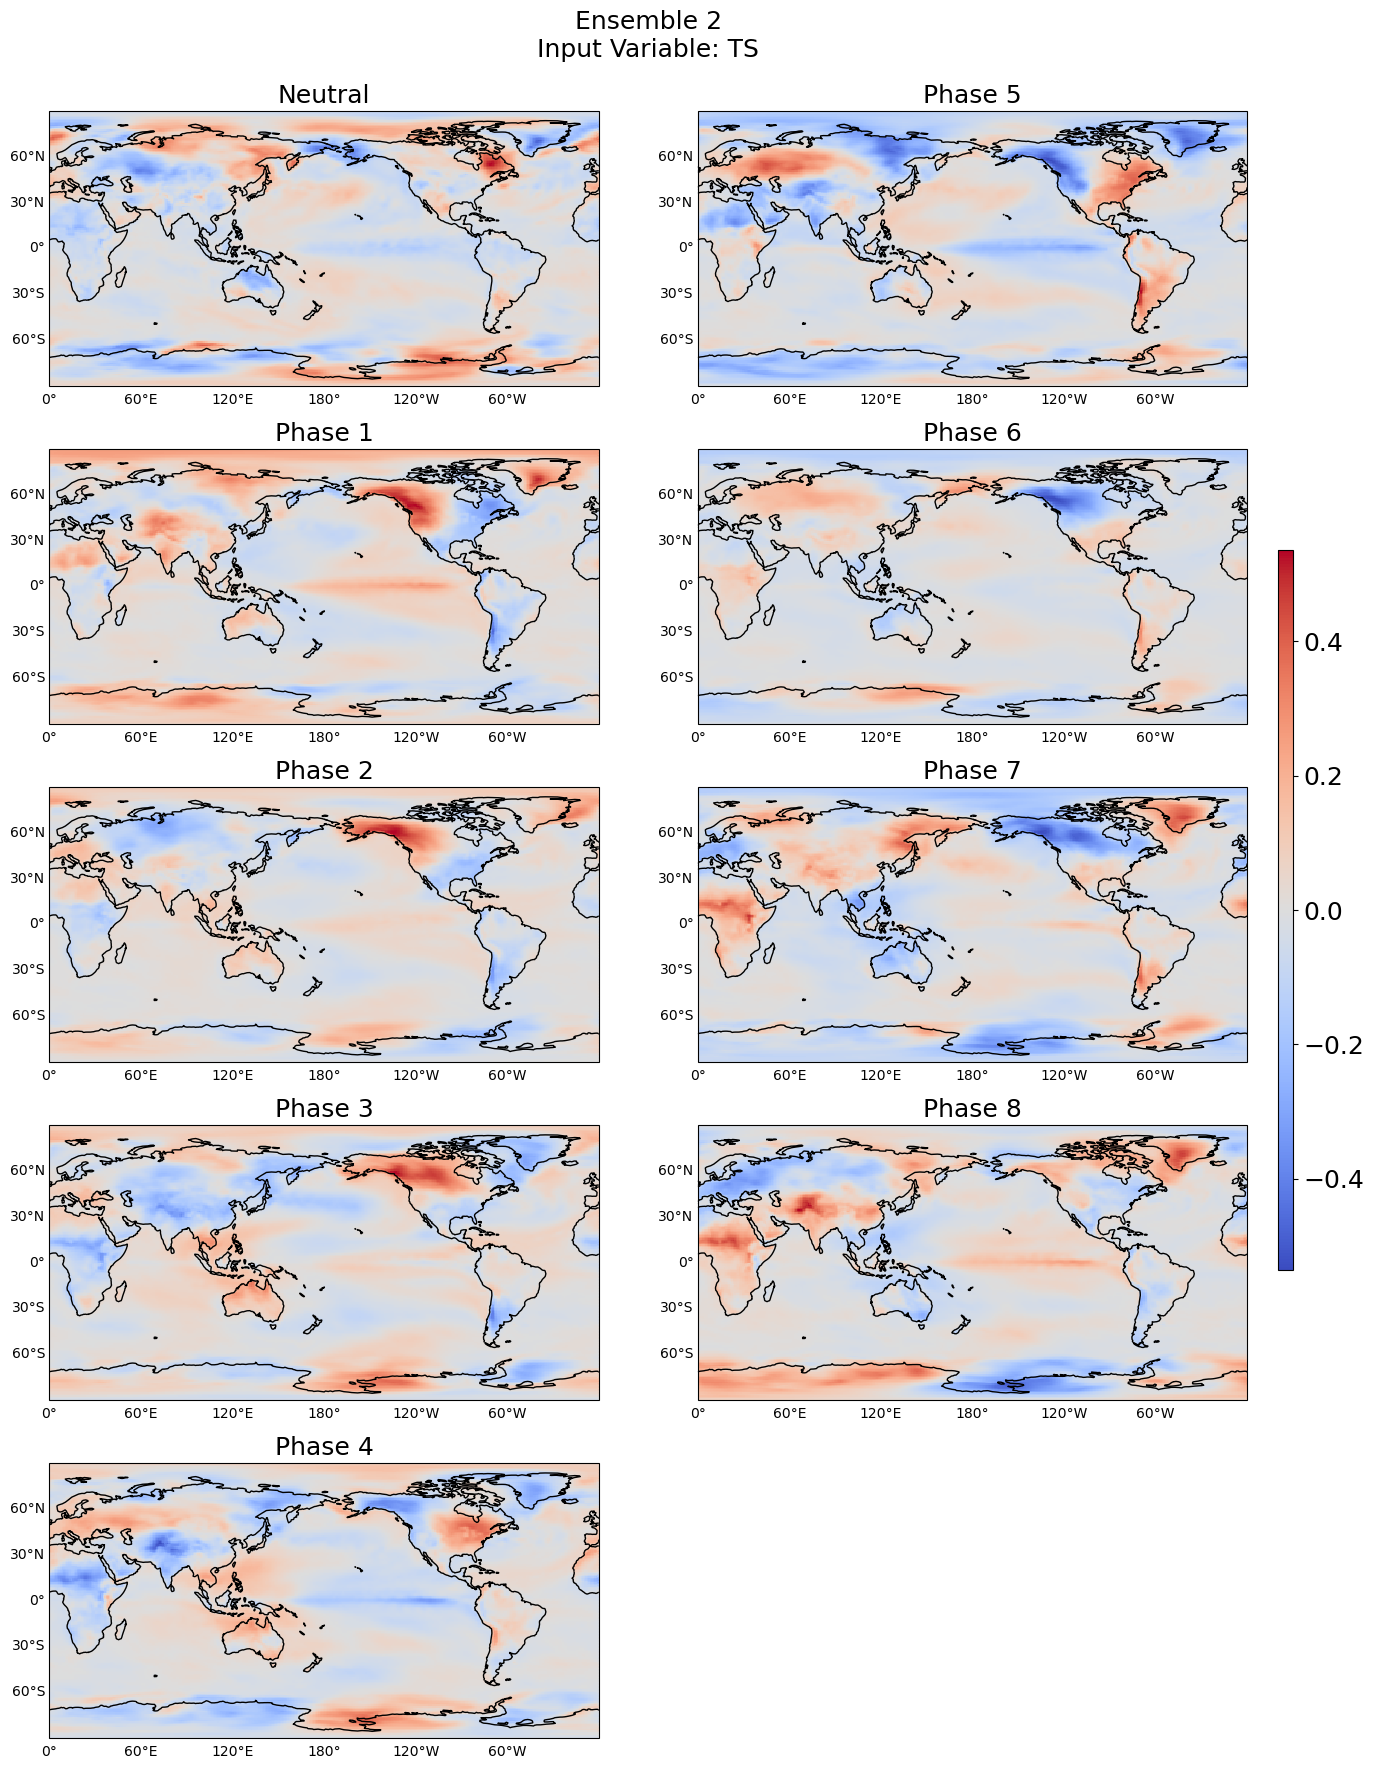

2
(60225, 7)


/pscratch/sd/p/plutzner/E3SM/databuilder/MJOindicescompositor.py:158: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


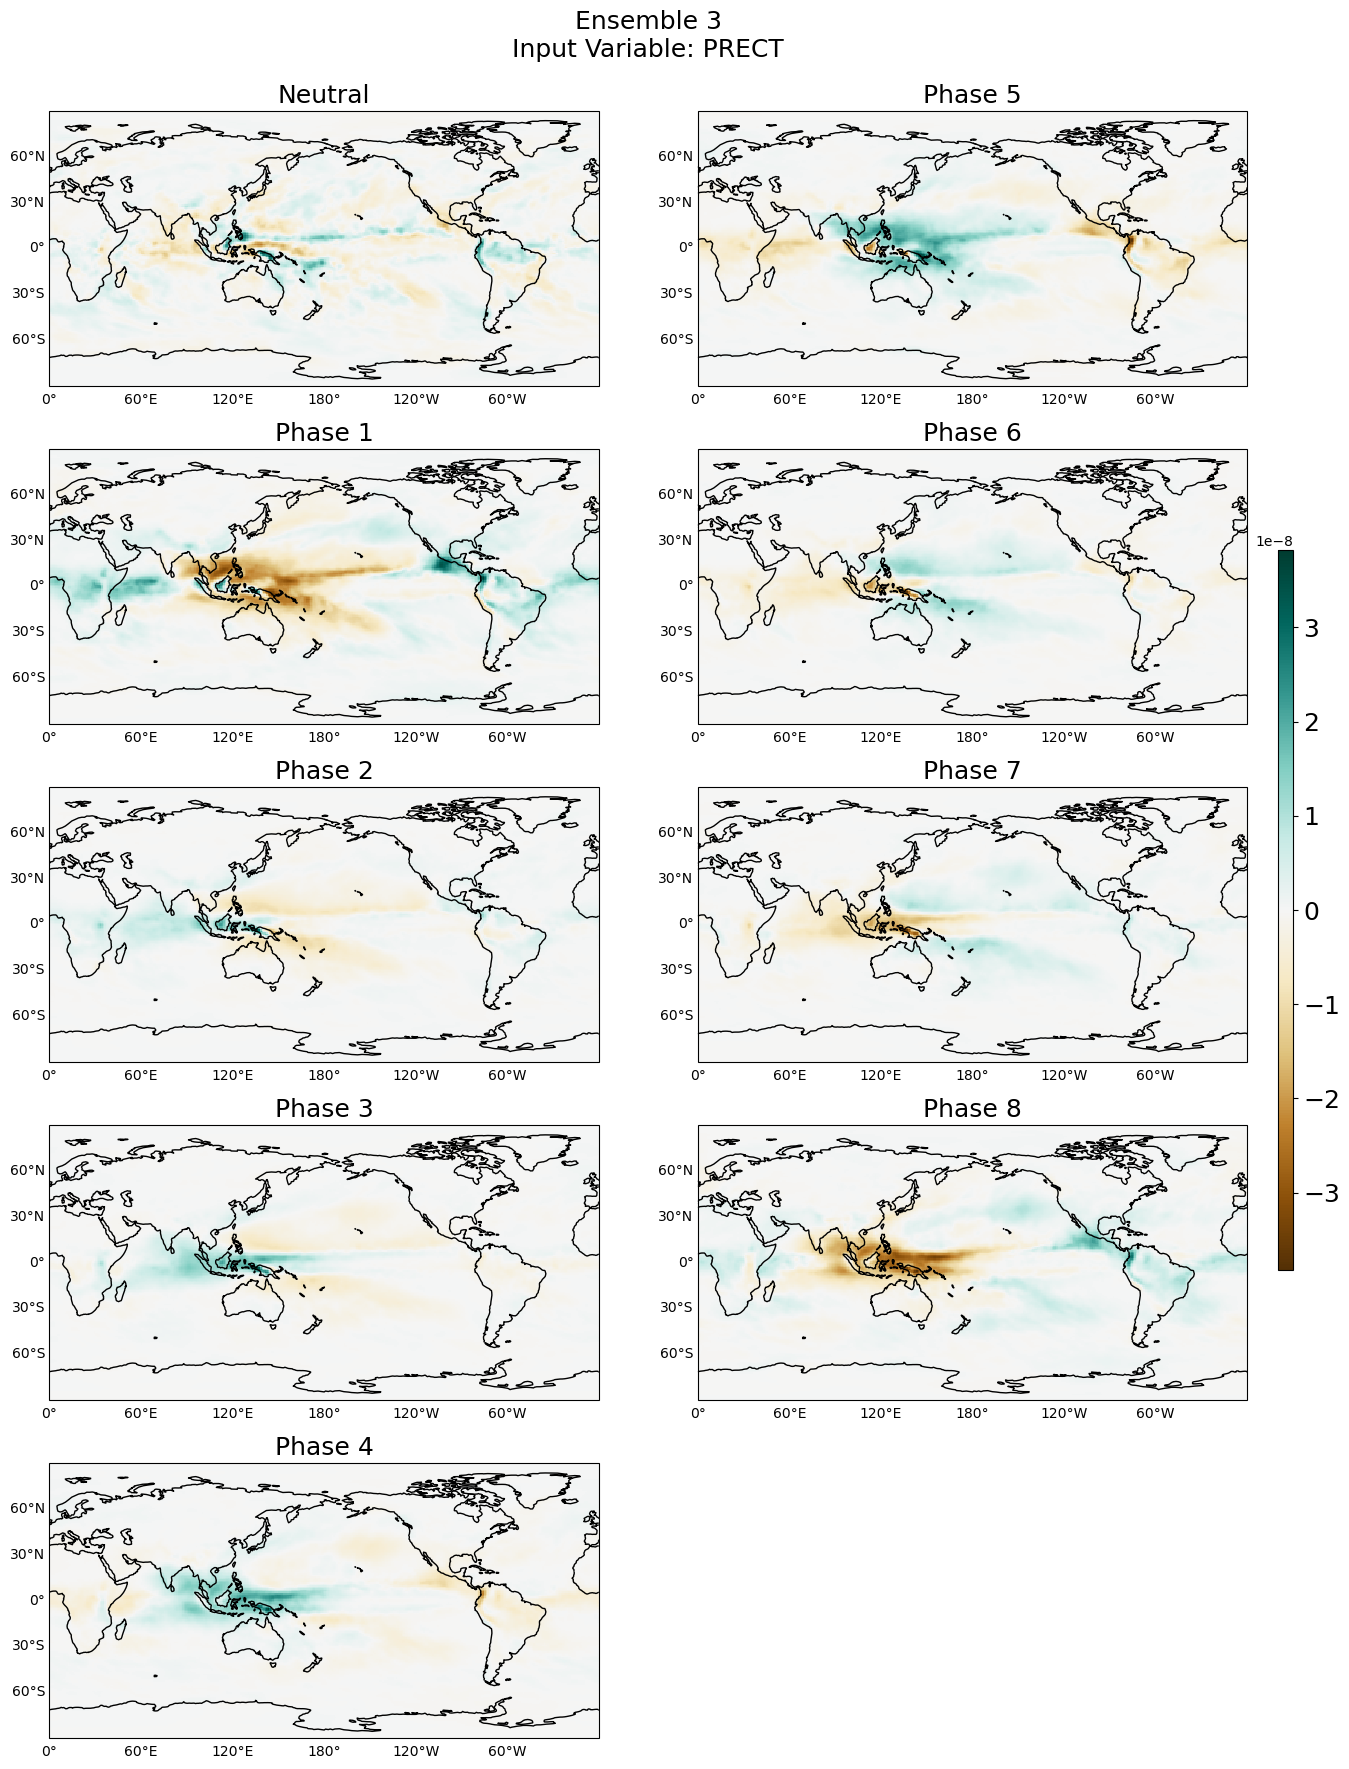

/pscratch/sd/p/plutzner/E3SM/databuilder/MJOindicescompositor.py:158: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


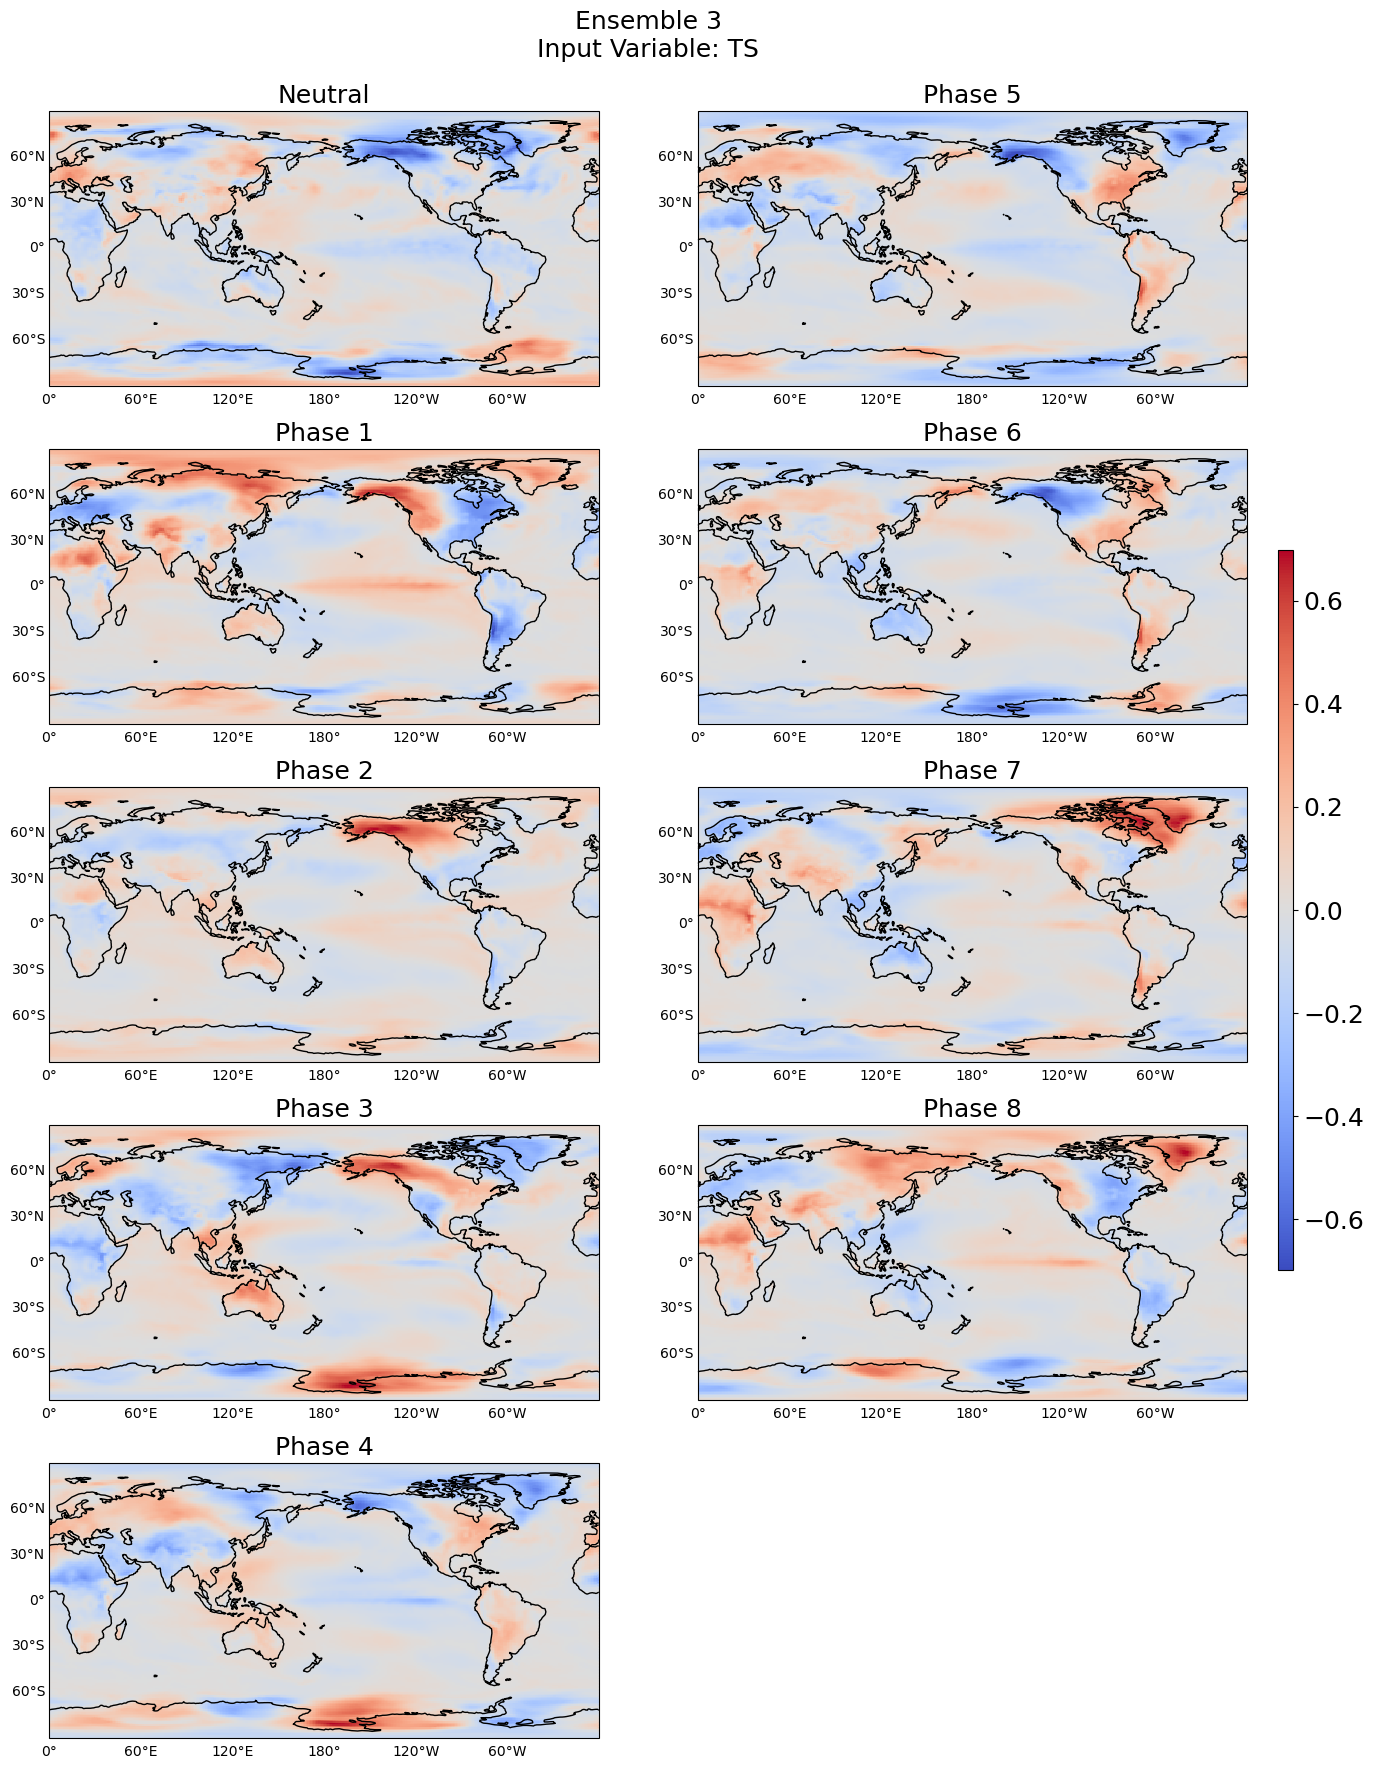

In [ ]:
import databuilder.MJOindicescompositor as MJOindicescompositor
from databuilder.MJOindicescompositor import compositeindices
imp.reload(MJOindicescompositor)

d_dict = {0: d_train, 1: d_val, 2:d_test}

MJOarray = np.zeros([60225, 7, 3])

for key in d_dict:
    print(key)
    MJOarray[...,key] = compositeindices(config, d_dict[key]["x"], iens=key) # Make MJO array data including leading nans available as an input


In [ ]:
import pickle
import gzip

MJOsavename = '/pscratch/sd/p/plutzner/E3SM/bigdata/presaved/MJOarray.leadnans.1850-2014.pkl'
with gzip.open(MJOsavename, "wb") as fp:
    pickle.dump(MJOarray, fp)

# with gzip.open(MJOsavename, "rb") as obj:
#     MJOarray = pickle.load(obj)
# obj.close()